<a href="https://colab.research.google.com/github/JamilePolycarpo/MachineLearning-Printer3D-Failer/blob/main/Yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytube
!pip install roboflow
! pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.0/793.0 kB 10.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Usi

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="rvUKE42pZxMtA2T76aCW")
project = rf.workspace("3d-printing-failure").project("spaghetti-3d")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.42, to fix: `pip install ultralytics==8.0.196`


In [ ]:
from ultralytics import YOLO


model = YOLO("yolov8n.pt")

model.train(data="/content/Spaghetti-3D-1/data.yaml", epochs=5, imgsz=640)

Ultralytics YOLOv8.2.42 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Spaghetti-3D-1/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

100%|██████████| 755k/755k [00:00<00:00, 43.2MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)


AMP: checks passed ✅


train: Scanning /content/Spaghetti-3D-1/train/labels... 515 images, 0 backgrounds, 0 corrupt: 100%|██████████| 515/515 [00:00<00:00, 1244.16it/s]

train: New cache created: /content/Spaghetti-3D-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Spaghetti-3D-1/valid/labels... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 1201.21it/s]

val: New cache created: /content/Spaghetti-3D-1/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 196. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.38G      2.273      3.236      2.228         12        640: 100%|██████████| 33/33 [00:08<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        100        196    0.00851      0.617      0.138     0.0438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.32G      2.161      2.741      2.129          9        640: 100%|██████████| 33/33 [00:04<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.85it/s]

                   all        100        196      0.111     0.0918     0.0498      0.014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.31G      2.127      2.719      2.106         10        640: 100%|██████████| 33/33 [00:04<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.32it/s]

                   all        100        196      0.198      0.194       0.11     0.0419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.32G      2.164       2.63      2.108         13        640: 100%|██████████| 33/33 [00:04<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.30it/s]

                   all        100        196      0.283      0.245      0.167     0.0636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.24G      2.085      2.545      2.039         14        640: 100%|██████████| 33/33 [00:04<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.90it/s]

                   all        100        196      0.276      0.342      0.227     0.0919



5 epochs completed in 0.010 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.42 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]


                   all        100        196      0.274      0.342      0.227     0.0918
         ['spaghetti']        100        196      0.274      0.342      0.227     0.0918
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 14.0ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d19d61562c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


image 1/1 /content/Spaghetti-3D-1/valid/images/imag-99-_jpg.rf.74c36bb2a7ac78991f247e813ffba2eb.jpg: 640x640 1 ['spaghetti'], 7.3ms
Speed: 1.6ms preprocess, 7.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


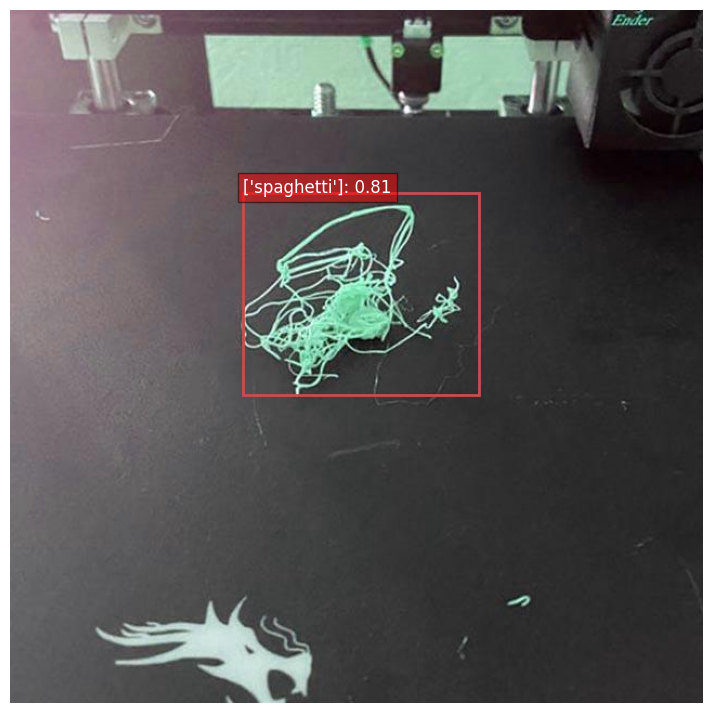

In [ ]:
# Carregar o modelo
import cv2
import numpy as np
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

model = YOLO("/content/runs/detect/train2/weights/best.pt")

# Carregar a imagem
image_path = "/content/Spaghetti-3D-1/valid/images/imag-99-_jpg.rf.74c36bb2a7ac78991f247e813ffba2eb.jpg"
image = Image.open(image_path)

# Processar a imagem e obter detecções
results = model(image_path)[0]

boxes = results.boxes
detections = boxes.xyxy.cpu().numpy()
confidences = boxes.conf.cpu().numpy()
class_ids = boxes.cls.cpu().numpy()

# Visualizar detecções
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)

for detection, conf, class_id in zip(detections, confidences, class_ids):
      x1, y1, x2, y2 = detection
      rect = Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
      ax.add_patch(rect)
      plt.text(x1, y1, f'{model.names[int(class_id)]}: {conf:.2f}', color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
      plt.axis('off')
      plt.show()

In [ ]:
import cv2
from ultralytics import YOLO

# Carregar o modelo treinado
model = YOLO('/content/runs/detect/train6/weights/best.pt')  # Caminho para o modelo treinado

# Capturar vídeo da webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Fazer a detecção
    results = model(frame)

    # Processar os resultados
    for result in results:
        boxes = result.boxes
        for box in boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
            conf = box.conf[0]
            cls = box.cls[0]

            # Desenhar as caixas delimitadoras e os rótulos na imagem
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f'{model.names[int(cls)]} {conf:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Mostrar a imagem com as detecções
    cv2.imshow('YOLOv8 Real-Time Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train6/weights/best.pt'

In [ ]:
from roboflow import Roboflow
from ultralytics import YOLO
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image

# Baixar o dataset e treinar o modelo (se necessário)
rf = Roboflow(api_key="rvUKE42pZxMtA2T76aCW")
project = rf.workspace("3d-printing-failure").project("spaghetti-3d")
version = project.version(1)
dataset = version.download("yolov8")

# Treinar o modelo YOLOv8
model = YOLO("yolov8n.pt")
model.train(data="Spaghetti-3D-1/data.yaml", epochs=10, imgsz=640)

# Função para construir a CNN
def build_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model


# Função para pré-processar as imagens para a CNN
def preprocess_image(image, target_size=(224, 224)):
    image = image.resize(target_size)
    image = np.array(image)
    image = image / 255.0
    return np.expand_dims(image, axis=0)

# Construir e compilar a CNN
cnn_model = build_cnn(input_shape=(224, 224, 3), num_classes=10)
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar a CNN
#cnn_model.fit(dummy_data, dummy_labels, epochs=10, batch_size=32)


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.42, to fix: `pip install ultralytics==8.0.196`
Ultralytics YOLOv8.2.42 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=Spaghetti-3D-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fal

train: Scanning /content/Spaghetti-3D-1/train/labels.cache... 515 images, 0 backgrounds, 0 corrupt: 100%|██████████| 515/515 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Spaghetti-3D-1/valid/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 196. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train5
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.43G      2.354      3.489       2.45          3        640: 100%|██████████| 33/33 [00:07<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.59it/s]

                   all        100        196    0.00711       0.52     0.0526     0.0168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.35G      2.286      3.105      2.399         22        640: 100%|██████████| 33/33 [00:04<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.98it/s]

                   all        100        196     0.0176      0.724     0.0401     0.0144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.34G      2.251      3.048      2.359          8        640: 100%|██████████| 33/33 [00:04<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.55it/s]

                   all        100        196     0.0699      0.133     0.0333     0.0109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.34G      2.266      3.012      2.363         11        640: 100%|██████████| 33/33 [00:04<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.83it/s]

                   all        100        196      0.176      0.173       0.11     0.0404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.33G      2.212      2.898      2.311         23        640: 100%|██████████| 33/33 [00:04<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.13it/s]

                   all        100        196      0.171      0.133     0.0832     0.0298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.34G      2.183      2.817      2.305         20        640: 100%|██████████| 33/33 [00:04<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.95it/s]

                   all        100        196      0.214      0.209       0.13     0.0481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.33G      2.132      2.741      2.249         22        640: 100%|██████████| 33/33 [00:04<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.08it/s]

                   all        100        196      0.251      0.199      0.148      0.056



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.34G      2.065      2.642      2.187         12        640: 100%|██████████| 33/33 [00:04<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.53it/s]

                   all        100        196        0.2       0.27       0.15     0.0581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.33G      2.018      2.591      2.168         11        640: 100%|██████████| 33/33 [00:04<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.21it/s]

                   all        100        196      0.304      0.281      0.196     0.0752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.33G      2.011      2.535      2.116          4        640: 100%|██████████| 33/33 [00:04<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.01it/s]

                   all        100        196      0.297      0.245        0.2     0.0853



10 epochs completed in 0.041 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.2MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics YOLOv8.2.42 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]


                   all        100        196      0.301      0.245      0.201     0.0854
         ['spaghetti']        100        196      0.301      0.245      0.201     0.0854
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/train5



image 1/1 /content/Spaghetti-3D-1/valid/images/imag-99-_jpg.rf.74c36bb2a7ac78991f247e813ffba2eb.jpg: 640x640 1 ['spaghetti'], 7.4ms
Speed: 1.7ms preprocess, 7.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
1/1 [==============================] - 0s 86ms/step


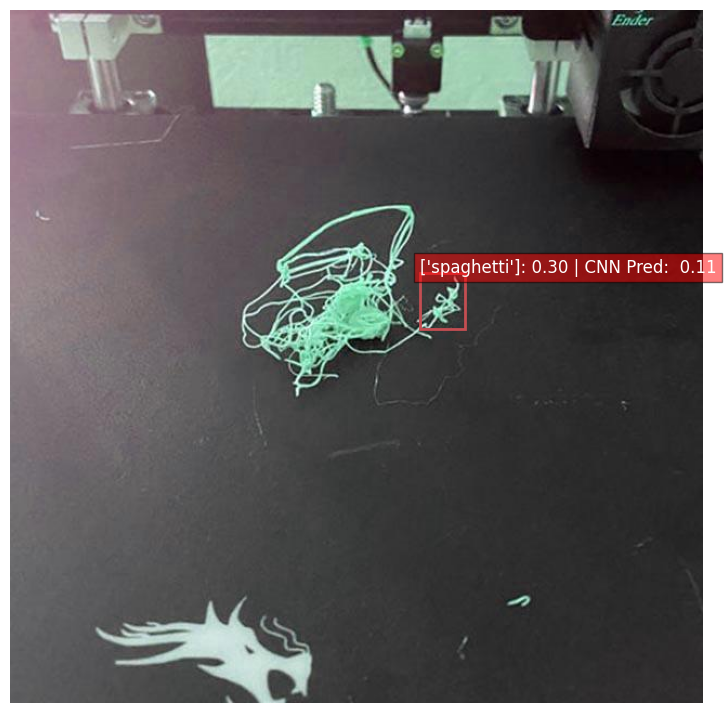

In [ ]:
# Carregar o modelo YOLOv8 treinado
model = YOLO("/content/runs/detect/train5/weights/best.pt")

# Carregar a imagem para teste
image_path = "/content/Spaghetti-3D-1/valid/images/imag-99-_jpg.rf.74c36bb2a7ac78991f247e813ffba2eb.jpg"
image = Image.open(image_path)

# Processar a imagem e obter detecções
results = model(image_path)[0]

boxes = results.boxes
detections = boxes.xyxy.cpu().numpy()
confidences = boxes.conf.cpu().numpy()
class_ids = boxes.cls.cpu().numpy()


# Pré-processar a imagem para a CNN, usando o tamanho correto
processed_image = preprocess_image(image, target_size=(224, 224)) # Change the target size to (224, 224)

# Fazer predições com a CNN


prediction = cnn_model.predict(processed_image)
predicted_class = np.argmax(prediction[0])
predicted_confidence = prediction[0][predicted_class]  # Obter a confiança da predição


# Visualizar as detecções e predições na imagem original
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)

for i, (detection, conf, class_id) in enumerate(zip(detections, confidences, class_ids)):
    x1, y1, x2, y2 = detection
    rect = Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.text(x1, y1, f'{model.names[int(class_id)]}: {conf:.2f} | CNN Pred:  {predicted_confidence:.2f}', color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5)) # Remove [i] from predicted_class and predicted_confidence

plt.axis('off')
plt.show()